In [2]:
#import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.interpolate

In [4]:
data=pd.read_csv('./simple_kestrel_trans1_CSV_standalone.csv')

In [5]:
data.describe()

,time,T_pps,dt,energy_prod,flowing temp out,m_dot_pps,mass_prod,mass_rate,prod_point_pres,prod_point_temp
count,1.160000e+02,116.0,1.160000e+02,1.160000e+02,116.000000,116.000000,1.160000e+02,116.000000,1.160000e+02,116.000000
mean,8.789647e+06,323.0,5.440849e+05,6.845766e+12,156.921013,6.939655,1.046918e+07,19.313459,2.265850e+07,436.222793
std,1.636086e+07,0.0,8.720755e+05,1.088605e+13,14.806324,0.649934,1.674086e+07,2.211729,4.603065e+04,6.986389
min,0.000000e+00,323.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,2.250376e+07,410.044831
25%,8.097290e+04,323.0,4.879948e+03,6.188066e+10,158.789293,7.000000,9.298194e+04,19.055130,2.265193e+07,438.976693
50%,5.380163e+05,323.0,4.385087e+04,5.594815e+11,158.953051,7.000000,8.404755e+05,19.244106,2.267510e+07,438.984603
75%,7.525189e+06,323.0,6.790483e+05,8.795525e+12,159.007518,7.000000,1.319515e+07,19.403634,2.268214e+07,439.019635
max,6.311385e+07,323.0,2.592000e+06,3.291750e+13,159.203796,7.000000,5.005220e+07,30.525562,2.272218e+07,439.246334


In [6]:
data.insert(loc=0, column='days', value = 0)

In [7]:
data.insert(loc=0, column='years', value = 0)

In [8]:
data.insert(loc=0, column='prod_temp', value = 0)

In [9]:
data.days = data.time/(24*60*60)

In [10]:
data.years = data.days/(365)

In [11]:
data.insert(loc=0, column='recovery', value = 0)

In [12]:
data.recovery = (data.mass_rate/5) * 100

In [13]:
data.prod_temp = (data.energy_prod/data.mass_prod)/4200

In [14]:
sns.set()

In [15]:
sns.set_style("whitegrid")

In [16]:
sns.set_context("paper")

Text(0, 0.5, 'Mass Rate\n(kg/s)')

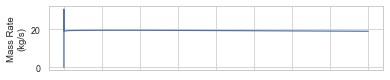

In [17]:
ax1 = plt.subplot(311)
sns.lineplot('years', 'mass_rate', data = data)
plt.setp(ax1.get_xticklabels(), visible = False)
ax1.set_xlabel('')
ax1.set_ylabel('Mass Rate\n(kg/s)')

Text(19.700000000000003, 0.5, 'Production Temp\n(deg C)')

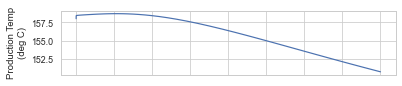

In [18]:
ax2 = plt.subplot(312, sharex=ax1)
sns.lineplot('years', 'prod_temp', data = data)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.set_xlabel('')
ax2.set_ylabel('Production Temp\n(deg C)')

Text(0.5, 14.7, 'Years')

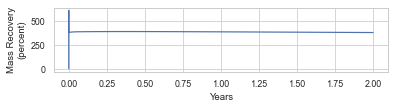

In [19]:
ax3 = plt.subplot(313, sharex=ax1)
sns.lineplot('years', 'recovery', data = data)
ax3.set_ylabel('Mass Recovery\n(percent)')
ax3.set_xlabel('Years')

In [20]:
plt.suptitle('Trajectory 3-1b', fontsize=16)

Text(0.5, 0.98, 'Trajectory 3-1b')

<Figure size 432x288 with 0 Axes>

(2, 10)

AttributeError: 'Line2D' object has no property 'sharex'

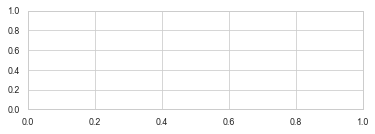

In [22]:
plt.subplot(211)
plt.plot('years', 'recovery', sharex=ax1, data = data)
plt.subplot(212)
sns.lineplot('years', 'mass_rate', data = data)

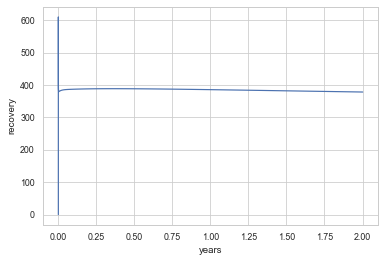

In [23]:
sns.lineplot('years', 'recovery', data = data)